### Область работы 1 (библиотеки)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection  import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
# from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from IPython.display import Image

import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_selection  import RFE
from sklearn.decomposition import PCA


### Область работы 2 (выполнение лучшей модели)

In [2]:
# Путь к тренировочному набору
path_train = 'train_house_B.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test_house_B.csv' # содержит только имя файла, без имен папок

df_train = pd.read_csv(path_train)
X_test = pd.read_csv(path_test)

In [3]:
# Блок(и) обучения и поверки модели

In [4]:
y = df_train['price']
X = df_train.drop(columns=['price'])

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True)

In [6]:
pipe_1 = LinearRegression()
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_val)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_val, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_val, y_pred_1))

Train: 1027496270795.3474
Test: 1070827697959.7418
Train: 0.17413147387241992
Test: 0.1812521242009195


In [7]:
rfe_select = RFE(LinearRegression(), step = 1, 
                 n_features_to_select=15)
rfe_select.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

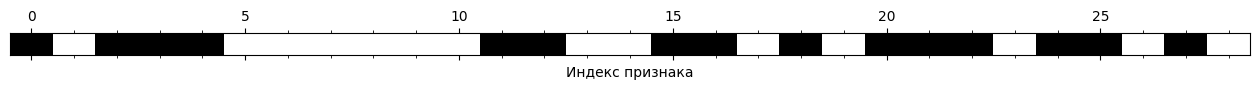

In [8]:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

In [9]:
X_train_imp = X_train[X_train.columns[mask]]
X_val_imp = X_val[X_train.columns[mask]]
features_names_imp = X_train.columns[mask]

In [10]:
features_names_imp


Index(['0', '2', '3', '4', '11', '12', '15', '16', '18', '20', '21', '22',
       '24', '25', '27'],
      dtype='object')

In [11]:
lr = LinearRegression()
lr.fit(X[list(features_names_imp)], y)

LinearRegression()

In [12]:
# Маска отобраных ** НАЗВАНИЙ СТОЛБЦОВ ** для предсказания из тестового набора
mask = list(features_names_imp)
X_test = X_test[mask]

In [13]:
mask

['0',
 '2',
 '3',
 '4',
 '11',
 '12',
 '15',
 '16',
 '18',
 '20',
 '21',
 '22',
 '24',
 '25',
 '27']

In [14]:
# Блок предсказания с использованием тестового набора

In [15]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = lr.predict(X_test)

In [16]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict

array([5298629.34217827, 4270429.24511305, 7774078.68766158,
       7554890.24884633, 6995879.1122809 , 4118196.85744191,
       4056727.12491687, 4411397.56859757, 3193451.6296696 ,
       4574243.40959266, 5321704.84984733, 4478155.06109704,
       3620506.3124489 , 5572233.49345772, 6270560.28351174,
       6530400.76300672, 3301989.85549004, 2845558.01200553,
       7445073.57945383, 3897226.20398296, 3833387.75177151,
       4643046.66143473, 4789522.69312008, 2389712.936019  ,
       3673612.09712093, 3167153.95129584, 7147459.4694669 ,
       2780971.70536361, 6134582.84362927, 5907383.88289936,
       4053298.05064747, 3964113.26780267, 6633819.69470503,
       2049295.34961275, 3005785.86952906, 5312305.6219644 ,
       3368175.15333943, 4661612.73016857, 3681207.50864414,
       5990246.77608703, 5777223.80508462, 8923262.27975271,
       2740311.95462884, 5466437.35017992, 3418093.39795035,
       6140218.88231503, 8666057.29797617, 3519888.9969416 ,
       5816899.16180845,

(137,) (137,)
Отрицательные цены -  0
Max Error: 4,850,850
 
----------------------
   MAPE Error: 17.85
----------------------


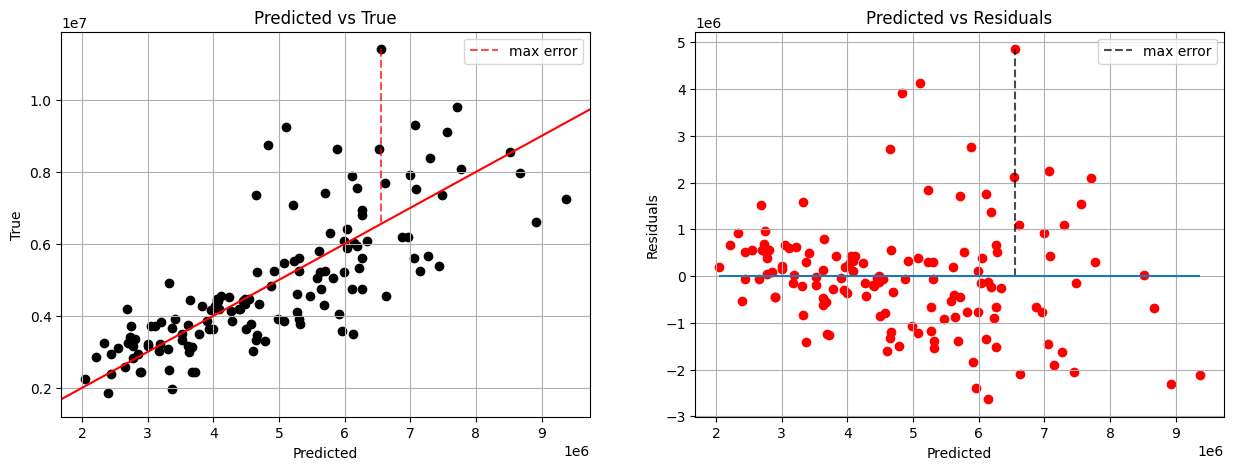

In [17]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_B.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [18]:
mask = features_names_imp

import pickle
with open('saved_dictionary_b.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,10,1
1,27,airconditioning
2,2,area
3,12,area bathrooms
4,4,area bedrooms
5,5,area stories
6,15,basement
7,22,bathrooms
8,19,bathrooms stories
9,21,bedrooms
